# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.748678e+01     1.240680e+01
 * time: 0.0014858245849609375
     1     2.965946e+01     5.757237e+00
 * time: 0.00638890266418457
     2     2.563198e+01     4.657270e+00
 * time: 0.011398792266845703
     3     2.104573e+01     2.127286e+00
 * time: 0.01630687713623047
     4     1.988164e+01     2.104233e+00
 * time: 0.021300792694091797
     5     1.940787e+01     2.275576e+00
 * time: 0.025404930114746094
     6     1.859945e+01     1.366449e+00
 * time: 0.02954888343811035
     7     1.809403e+01     1.183594e+00
 * time: 0.03363180160522461
     8     1.784295e+01     9.874373e-01
 * time: 0.037832021713256836
     9     1.769779e+01     7.215056e-01
 * time: 0.04191899299621582
    10     1.759011e+01     4.751610e-01
 * time: 0.04595685005187988
    11     1.752272e+01     5.271990e-01
 * time: 0.05015087127685547
    12     1.749356e+01     6.224452e-01
 * time: 0.05337381362915039
    13     1.745082e+01     4.584032e-01
 *

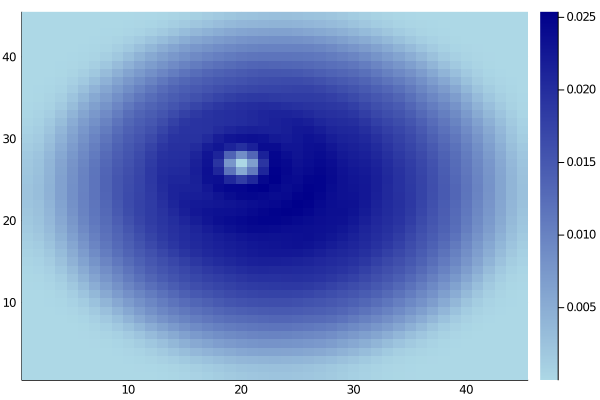

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)